In [1]:
from sys import implementation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# scikit prediction model
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model  import LinearRegression


In [2]:
# Loading data
df = pd.read_csv("dataset.csv")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
numerical_features = [
    "Application order","Age at enrollment", "Curricular units 1st sem (credited)", "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)","Curricular units 1st sem (approved)","Curricular units 1st sem (grade)",
    "Curricular units 1st sem (without evaluations)","Curricular units 2nd sem (credited)","Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)","Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (without evaluations)","Unemployment rate","Inflation rate","GDP"
]
categorical_features = [
    "Marital status","Application mode","Course","Daytime/evening attendance","Previous qualification","Nationality",
    "Mother's qualification","Father's qualification","Mother's occupation","Father's occupation","Displaced",
    "Educational special needs","Debtor","Tuition fees up to date","Gender","Scholarship holder","International","Target"
]

target = "Curricular units 2nd sem (grade)"

I. Mathematical introduction

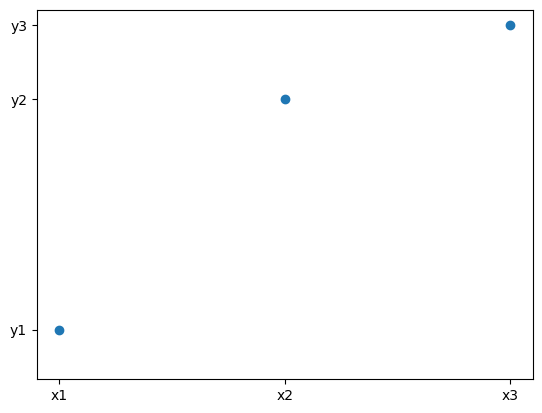

In [4]:
categories =["x1","x2","x3"]
y_values = [0.14,0.79,1]
plt.scatter(categories,y_values)
plt.yticks(y_values,["y1","y2","y3"])
plt.ylim(bottom=0.0)
plt.show()

We can see that these points are very close to be fit in one straight line. So we can write system of linear equations which are trying
to calculate the same two factors and because of multitude attributes we can only bring closer this straight line to be as closest to every points as it could.

$$y_1 = \theta_1*x_1 + \theta_0$$
$$y_2 = \theta_1*x_2 + \theta_0$$
$$y_3 = \theta_1*x_3 + \theta_0$$




In general case with $n$ attributes value of predicted formula looks like:
$$ \hat{y} = \theta_0 + \theta_1*x_1 + \theta_2 * x_2 + ... + \theta_n * x_n$$

Using closed form of linear regression we can calulate this $\theta$ vector.
$$ \theta = \left( X^T X \right)^{-1} X^T y $$


Where:
- $X$ — vector of input values corresponding to $x_n$ attributes
- $y$ — vector of output values corresponding to $y_n$ attributes



$X$ matrix looks like:
$$
\begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
1 & x_3
\end{bmatrix}
$$
where the first column is for bias ( $\theta_0$ )

II. Numpy implementation

In [5]:
X = df.drop([target],axis=1)
y = df[target]


X_train,X_temp,y_train,y_temp = train_test_split(X,y,train_size=0.4,random_state=42)
X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,random_state=42,train_size=0.5)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore',sparse_output=False), categorical_features)
    ]
)
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)



#main part
X_train = np.c_[np.ones(len(y_train)),X_train_processed]
X_test = np.c_[np.ones(len(y_test)),X_test_processed]
X_val = np.c_[np.ones(len(y_val)),X_val_processed]


# Train on training data
theta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train


#Evaluating score on test data,validation data, and also training data
y_pred_on_test = X_test @ theta
y_pred_on_train = X_train @ theta
y_pred_on_valid = X_val @ theta




III. Testing and comparing to scikit-learn method

In [6]:
from sklearn.metrics import r2_score, mean_absolute_error

In [7]:
r2 = r2_score(y_test, y_pred_on_test)
print(f"R² for y_pred_on_test: {r2}")
mae = mean_absolute_error(y_test, y_pred_on_test)
print(f"MAE for y_pred_on_test: {mae}")

r2 = r2_score(y_train, y_pred_on_train)
print(f"R² for y_pred_on_train: {r2}")

mae = mean_absolute_error(y_train, y_pred_on_train)
print(f"MAE for y_pred_on_train: {mae}")

r2 = r2_score(y_val, y_pred_on_valid)
print(f"R² for y_pred_on_valid: {r2}")
mae = mean_absolute_error(y_val, y_pred_on_valid)
print(f"MAE for y_pred_on_valid: {mae}")


R² for y_pred_on_test: 0.8312199839493326
MAE for y_pred_on_test: 1.5483025402662765
R² for y_pred_on_train: 0.8364076966338141
MAE for y_pred_on_train: 1.418819432389071
R² for y_pred_on_valid: 0.809923793212239
MAE for y_pred_on_valid: 1.576820337175782


IV. Scikit implementation


In [8]:
X = df.drop([target], axis=1)
y = df[target]
X_train,X_temp,y_train,y_temp = train_test_split(X,y,train_size=0.4,random_state=42)
X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,random_state=42,train_size=0.5)
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

regression_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

regression_pipeline.fit(X_train, y_train)
y_pred_on_test = regression_pipeline.predict(X_test)
y_pred_on_valid = regression_pipeline.predict(X_val)
y_pred_on_train = regression_pipeline.predict(X_train)

r2 = r2_score(y_test, y_pred_on_test)
print(f"R² for y_pred_on_test: {r2}")
mae = mean_absolute_error(y_test, y_pred_on_test)
print(f"MAE for y_pred_on_test: {mae}")

r2 = r2_score(y_train, y_pred_on_train)
print(f"R² for y_pred_on_train: {r2}")

mae = mean_absolute_error(y_train, y_pred_on_train)
print(f"MAE for y_pred_on_train: {mae}")

r2 = r2_score(y_val, y_pred_on_valid)
print(f"R² for y_pred_on_valid: {r2}")
mae = mean_absolute_error(y_val, y_pred_on_valid)
print(f"MAE for y_pred_on_valid: {mae}")



R² for y_pred_on_test: 0.8313185087578865
MAE for y_pred_on_test: 1.5476400836283353
R² for y_pred_on_train: 0.8364076809948044
MAE for y_pred_on_train: 1.418885695189249
R² for y_pred_on_valid: 0.8099401627799723
MAE for y_pred_on_valid: 1.5764671674331825
